# Titanic: Machine Learning from Disaster


In [1]:
# Importing the matplotlib for plotting, numpy and pandas


import numpy as np
import pandas as pd
%matplotlib inline

train_dataset = pd.read_csv('./data/titanic/train.csv')
print(train_dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
test_dataset = pd.read_csv('./data/titanic/test.csv')
print(test_dataset.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [3]:
test_dataset.is_copy = False
test_dataset['Survived']=-1
train_dataset = train_dataset[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
mergedTitanicDS = train_dataset.append(test_dataset)

In [4]:
# Identify the missing values
for col in mergedTitanicDS:
    if mergedTitanicDS[col].isnull().sum()>0:
        print("Missing Values in %s %d" % (col,(mergedTitanicDS[col].isnull().sum())))


Missing Values in Age 263
Missing Values in Fare 1
Missing Values in Cabin 1014
Missing Values in Embarked 2


In [5]:
# Get the distribution of the Embarked
mergedTitanicDS['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [6]:
mergedTitanicDS.is_copy = False
mergedTitanicDS.loc[mergedTitanicDS['Embarked'].isnull(),'Embarked'] = 'S'

In [7]:
mergedTitanicDS['IsCabinDataEmpty'] = 0
mergedTitanicDS.loc[mergedTitanicDS['Cabin'].isnull(),'IsCabinDataEmpty'] = 1

In [8]:
# Extract the Title and assign it to the new column
mergedTitanicDS['Title'] = [nameStr[1].strip().split('.')[0] for nameStr in mergedTitanicDS['Name'].str.split(',')]

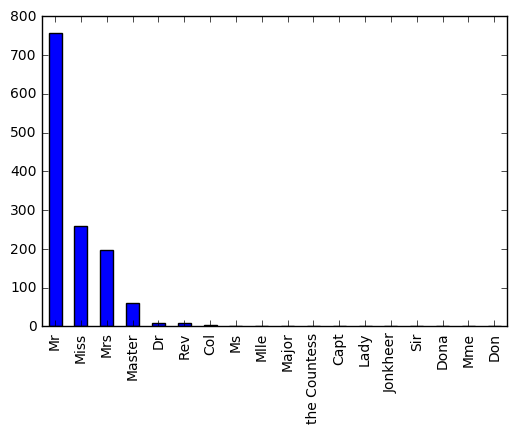

In [9]:
# The following plot shows the distribution of Titles
mergedTitanicDS['Title'].value_counts().plot.bar()

In [10]:
# Aggregate on Age by Title using mean
aggAgeByTitleDS = mergedTitanicDS[['Age','Title']].groupby(['Title']).mean().reset_index()

# Renaming the columns
aggAgeByTitleDS.columns = ['Title','Mean_Age']

# Merging by Title
mergedTitanicDS_Merged = pd.merge(mergedTitanicDS, aggAgeByTitleDS,on="Title")

# Replacing the missing values of Age by Mean Age
mergedTitanicDS_Merged.loc[mergedTitanicDS_Merged['Age'].isnull(),'Age']=mergedTitanicDS_Merged[mergedTitanicDS_Merged['Age'].isnull()]['Mean_Age']

In [11]:
# Applying the Fare for the missing values

mergedTitanicDS_Merged.loc[mergedTitanicDS_Merged['Fare'].isnull(),'Fare']=mergedTitanicDS_Merged[mergedTitanicDS_Merged['Pclass']==3]['Fare'].mean()

In [12]:
# Extracting Surname from the Name
mergedTitanicDS_Merged['Surname'] = [nameStr[0].strip() for nameStr in mergedTitanicDS_Merged['Name'].str.split(',')]


In [13]:
# Creating a new column called Family Size
mergedTitanicDS_Merged['FamilySize']=mergedTitanicDS_Merged['SibSp']+mergedTitanicDS_Merged['Parch']+1

In [14]:
# Identify the data types
mergedTitanicDS_Merged.dtypes

PassengerId           int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
Survived              int64
IsCabinDataEmpty      int64
Title                object
Mean_Age            float64
Surname              object
FamilySize            int64
dtype: object

In [15]:
# Transforming the Sex Feature as Categorical
mergedTitanicDS_Merged['Sex_Cat'] = pd.Categorical.from_array(mergedTitanicDS_Merged.Sex).codes


In [16]:
# Transform the Categorical Data Point to dummies
pd.get_dummies(mergedTitanicDS_Merged['Sex'])

,female,male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [17]:
# Converting Sex into a dummmy variable and binding it back to the original dataset
mergedTitanicDS_Merged = pd.concat([mergedTitanicDS_Merged,pd.get_dummies(mergedTitanicDS_Merged['Sex'])],axis = 1)

In [18]:
# Converting Embarked into a dummmy variable and binding it back to the original dataset

mergedTitanicDS_Merged = pd.concat([mergedTitanicDS_Merged,pd.get_dummies(mergedTitanicDS_Merged['Embarked'])],axis = 1)
# Converting Title into a dummmy variable and binding it back to the original dataset
mergedTitanicDS_Merged =pd.concat([mergedTitanicDS_Merged,pd.get_dummies(mergedTitanicDS_Merged['Title'])],axis = 1)

In [19]:
# Lets drop the unwanted features 
mergedTitanicDS_Merged_Red = mergedTitanicDS_Merged.drop(mergedTitanicDS_Merged[
        ['Name','Sex','Ticket','Cabin','Embarked','Mean_Age','Surname','male','Title']], axis=1)


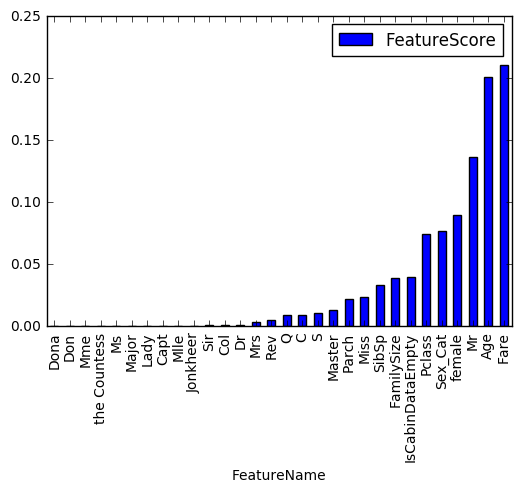

In [20]:
# Lets create the dataset that will be used for determining feature importance. 
featureNames = mergedTitanicDS_Merged_Red.ix[:,mergedTitanicDS_Merged_Red.columns.difference(['PassengerId','Survived'])].columns
Xtrain = mergedTitanicDS_Merged_Red[mergedTitanicDS_Merged_Red.Survived>=0].ix[:,mergedTitanicDS_Merged_Red.columns.difference(['PassengerId','Survived'])].values
ytrain = mergedTitanicDS_Merged_Red[mergedTitanicDS_Merged_Red.Survived>=0].ix[:,mergedTitanicDS_Merged_Red.columns == 'Survived'].values

Xtest = mergedTitanicDS_Merged_Red[mergedTitanicDS_Merged_Red.Survived<0].ix[:,mergedTitanicDS_Merged_Red.columns.difference(['PassengerId','Survived'])].values

# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

from sklearn.feature_selection import *
clf = ExtraTreesClassifier()
clf = clf.fit(Xtrain, ytrain.ravel())

clf.feature_importances_
featureMatrixDS = pd.DataFrame({'FeatureName':featureNames.ravel(),'FeatureScore':clf.feature_importances_})
featureMatrixDS=featureMatrixDS.sort_values(by=['FeatureScore'])
featureMatrixDS.plot.bar('FeatureName','FeatureScore')